# *Random Forest*

En este *Notebook* se evalua el modelo hiperparametrizado de RF.

## Librerías necesarias

In [1]:
import gc
from os import getcwd
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import gc
import seaborn as sns
from joblib import load

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

pd.set_option("display.max_columns", 80)

In [5]:
import itertools
def plot_confusion_matrix(cm, title, classes=['normal', 'abnormal'], save=False, save_as='MyFigure.png', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save:
        plt.savefig(save_as, dpi=100)

### Carga del modelo

In [2]:
clf = load('/home/jovyan/My-Notebooks/Signature Detection/rf-hyper/RF.joblib')

## Resultados

In [3]:
df = pd.read_csv('../Data Preprocess/test-SD.csv', sep=',', low_memory=False)
y_test = df.pop('Label')
X_test = df.values

In [6]:
%%time
predictions = clf.predict(X_test)

CPU times: user 2min 10s, sys: 10.9 s, total: 2min 21s
Wall time: 2min 21s


In [7]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99446   0.88364   0.93578   3567467
           1    0.95271   0.99613   0.97394    190047
           2    0.99996   0.99999   0.99997    378823
           3    0.99558   0.99988   0.99773     85642
           4    0.99290   0.91776   0.95385    114201
           5    0.05726   0.58895   0.10437     42681
           6    0.24029   0.98519   0.38635       270

    accuracy                        0.89888   4379131
   macro avg    0.74760   0.91022   0.76457   4379131
weighted avg    0.98393   0.89888   0.93654   4379131



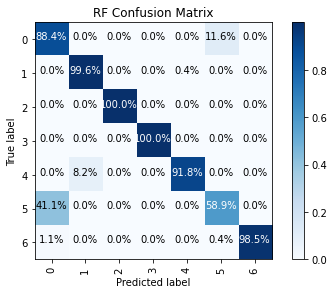

In [8]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, title='RF Confusion Matrix', classes=['0', '1', '2', '3', '4', '5', '6'])

In [9]:
dos_data = X_test[np.where(y_test == 1)]
preds = clf.predict(dos_data)

print("Precision on DoS attacks: " + str(len(np.where(preds == 1)[0]) / len(dos_data) * 100) + "%.")

Precision on DoS attacks: 99.61325356359217%.


In [10]:
ddos_data = X_test[np.where(y_test == 2)]
preds = clf.predict(ddos_data)

print("Precision on DDoS attacks: " + str(len(np.where(preds == 2)[0]) / len(ddos_data) * 100) + "%.")

Precision on DDoS attacks: 99.99868012237906%.


In [11]:
botnet_data = X_test[np.where(y_test == 3)]
preds = clf.predict(botnet_data)

print("Precision on Botnet attacks: " + str(len(np.where(preds == 3)[0]) / len(botnet_data) * 100) + "%.")

Precision on Botnet attacks: 99.98832348613998%.


In [12]:
bruteforce_data = X_test[np.where(y_test == 4)]
preds = clf.predict(bruteforce_data)

print("Precision on Bruteforce attacks: " + str(len(np.where(preds == 4)[0]) / len(bruteforce_data) * 100) + "%.")

Precision on Bruteforce attacks: 91.77590388875754%.


In [13]:
infiltration_data = X_test[np.where(y_test == 5)]
preds = clf.predict(infiltration_data)

print("Precision on Infiltration attacks: " + str(len(np.where(preds == 5)[0]) / len(infiltration_data) * 100) + "%.")

Precision on Infiltration attacks: 58.89505869122091%.


In [14]:
web_data = X_test[np.where(y_test == 6)]
preds = clf.predict(web_data)

print("Precision on Web attacks: " + str(len(np.where(preds == 6)[0]) / len(web_data) * 100) + "%.")

Precision on Web attacks: 98.51851851851852%.
